# 使用napari进行交互式图像可视化
[napari](https://napari.org/)是一个基于Python的图像查看器。今天，我们将通过从Jupyter笔记本远程控制它来使用它。

另请参阅
* [napari教程](https://napari.org/tutorials/index.html)
* [使用napari进行多维图像可视化的Python方法[NEUBIAS Academy@Home]网络研讨会](https://www.youtube.com/watch?v=VgvDSq5aCDQ)

为了打开图像，我们仍然使用scikit-image：

In [1]:
import napari

from skimage.io import imread

image = imread('../../data/Haase_MRT_tfl3d1.tif')

# print out the spatial dimensions of the image
print(image.shape)

(192, 256, 256)


In [2]:
# Create an empty viewer
viewer = napari.Viewer()

In [3]:
# Add a new layer containing an image
viewer.add_image(image)

<Image layer 'image' at 0x1d5a7bb9af0>

通过这个命令，我们可以对napari进行截图并将其保存在我们的笔记本中。

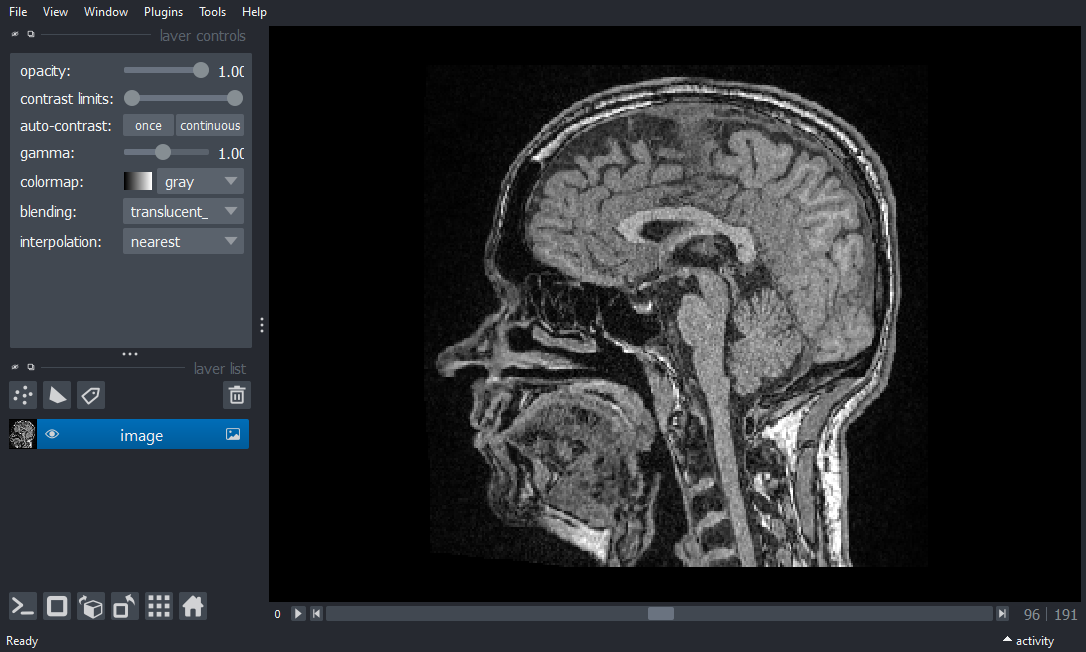

In [4]:
napari.utils.nbscreenshot(viewer)

## 切片

我们可以通过编程方式移动Z切片滑块，如下所示。

In [5]:
dims = viewer.dims.current_step
dims

(96, 128, 128)

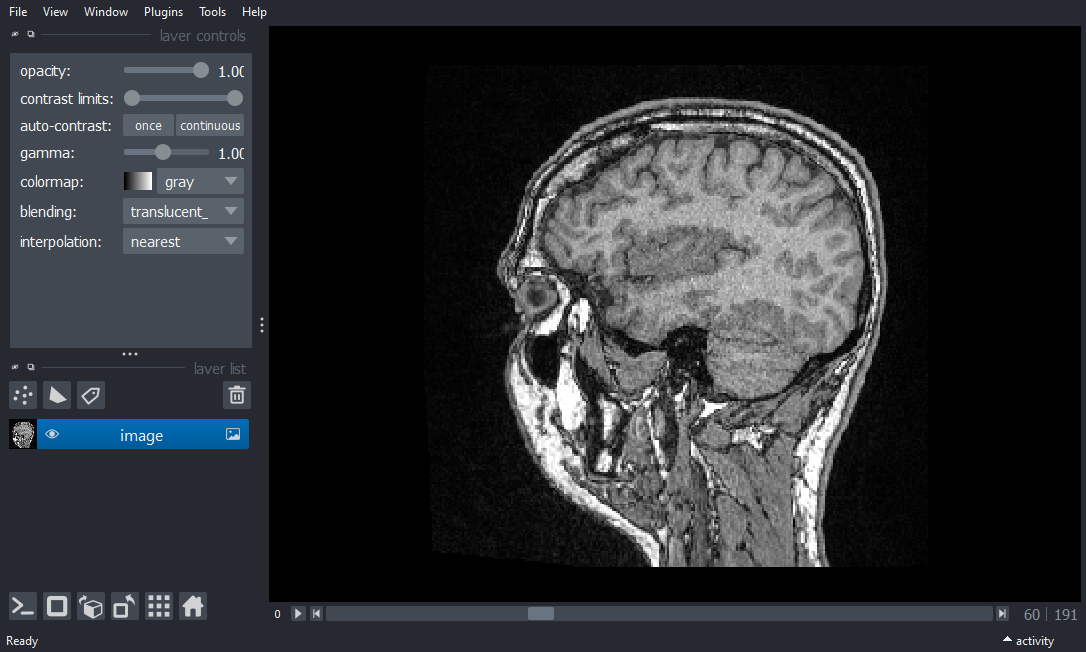

In [6]:
# modify Z-slice position
dims = list(dims)
dims[0] = 60
viewer.dims.current_step = dims

# take another screenshot
napari.utils.nbscreenshot(viewer)

## 3D渲染

我们还可以通过编程方式激活3D视图。

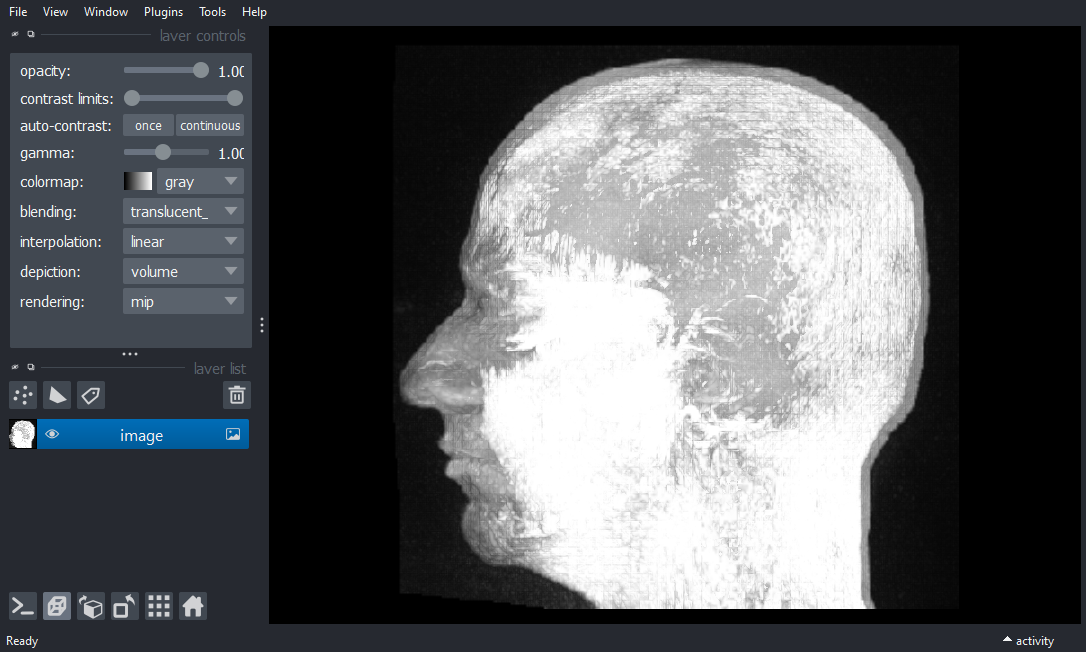

In [7]:
viewer.dims.ndisplay = 3

napari.utils.nbscreenshot(viewer)

## 相机方向

为了改变相机位置，建议在手动进行修改后打印出相机，例如。这可以帮助你理解`center`、`zoom`、`angles`等参数的含义。然后你可以使用Python修改这些参数。

In [8]:
viewer.camera

Camera(center=(95.5, 127.5, 127.5), zoom=2.2191406249999996, angles=(0.0, 0.0, 90.00000000000001), perspective=0.0, interactive=True)

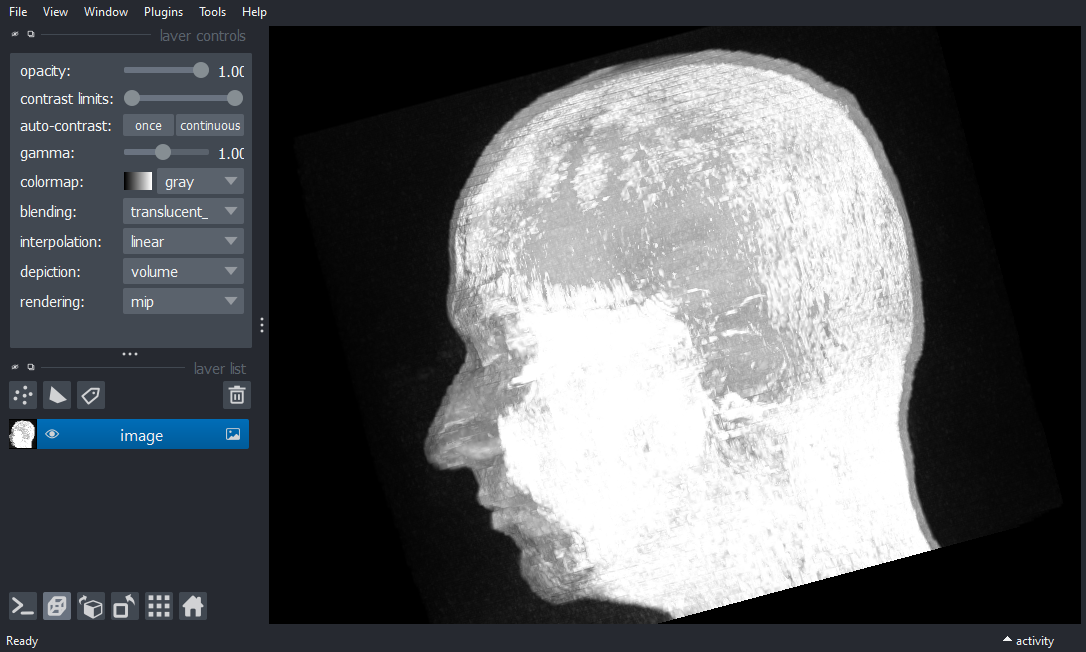

In [9]:
viewer.camera.angles = (15, -15, 90)

napari.utils.nbscreenshot(viewer)

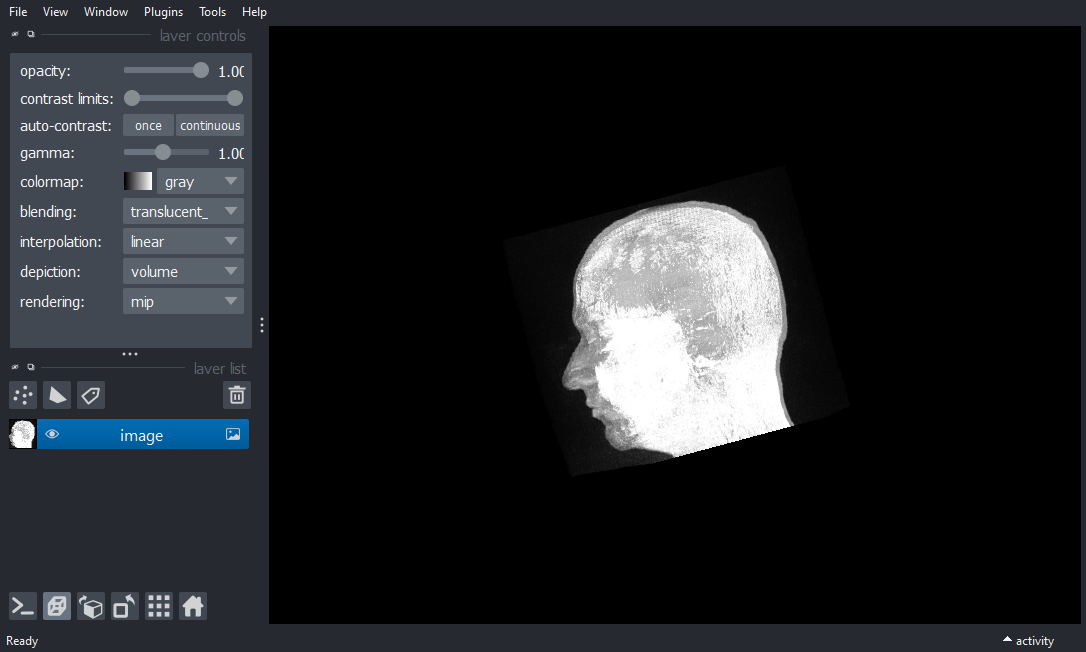

In [10]:
viewer.camera.zoom = 1

napari.utils.nbscreenshot(viewer)

In [11]:
viewer.dims.ndisplay = 2

dims[0] = 96
viewer.dims.current_step = dims

## 图层属性

要修改颜色映射/查找表和图像显示范围，你可以调用如下命令。

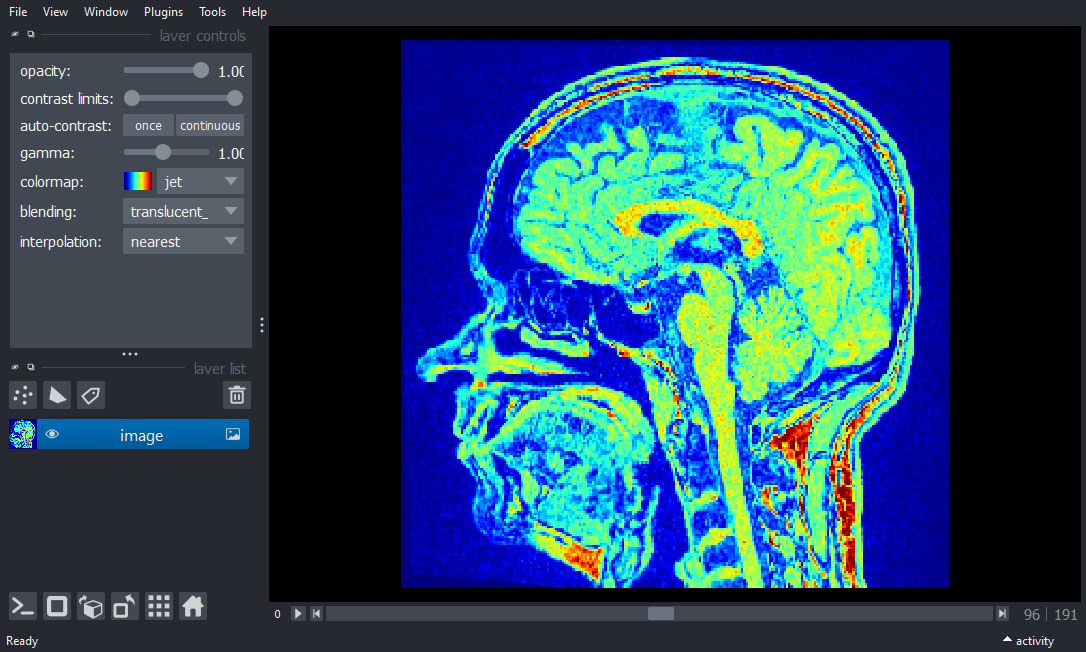

In [12]:
image_layer = viewer.layers[0]

image_layer.colormap = "jet"

napari.utils.nbscreenshot(viewer)

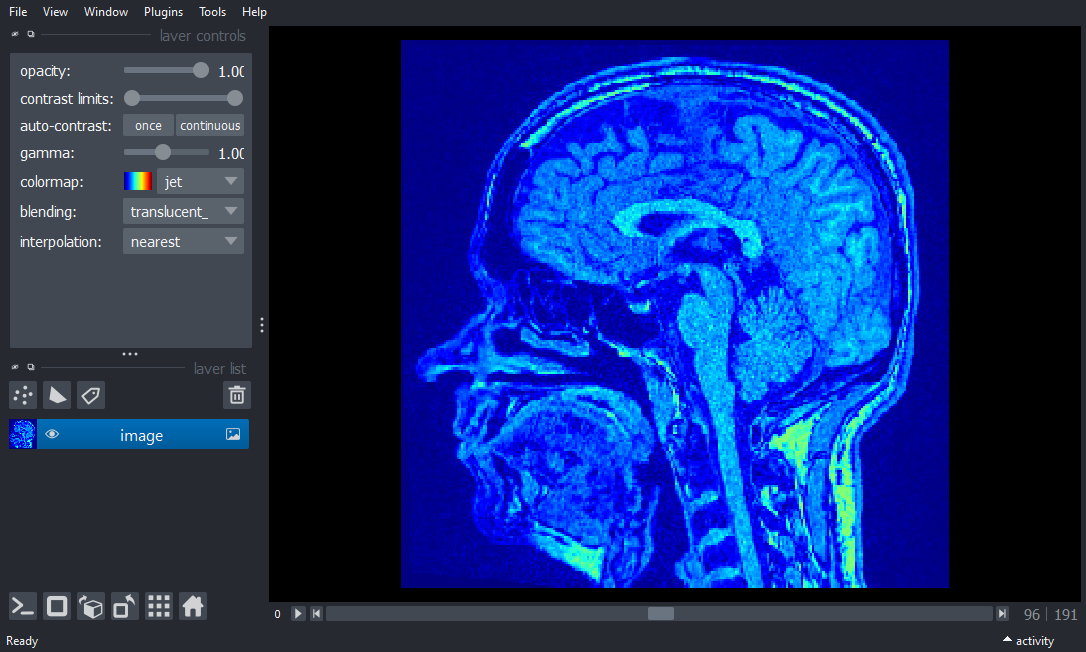

In [13]:
image_layer.contrast_limits = [0, 500]

napari.utils.nbscreenshot(viewer)

In [14]:
image_layer.colormap = 'gray'

## 可视化分割结果

分割结果通常在Napari中显示为标签图像。在标签图像中，像素强度对应于像素所属的对象（类别）。例如，在语义分割中，强度为1的像素属于类别1，强度为2的像素属于类别2。在进行实例分割时，强度为1的像素属于对象1。强度为2的像素属于对象2。

标签图像可以使用`viewer.add_labels()`命令添加到Napari的图层列表中。

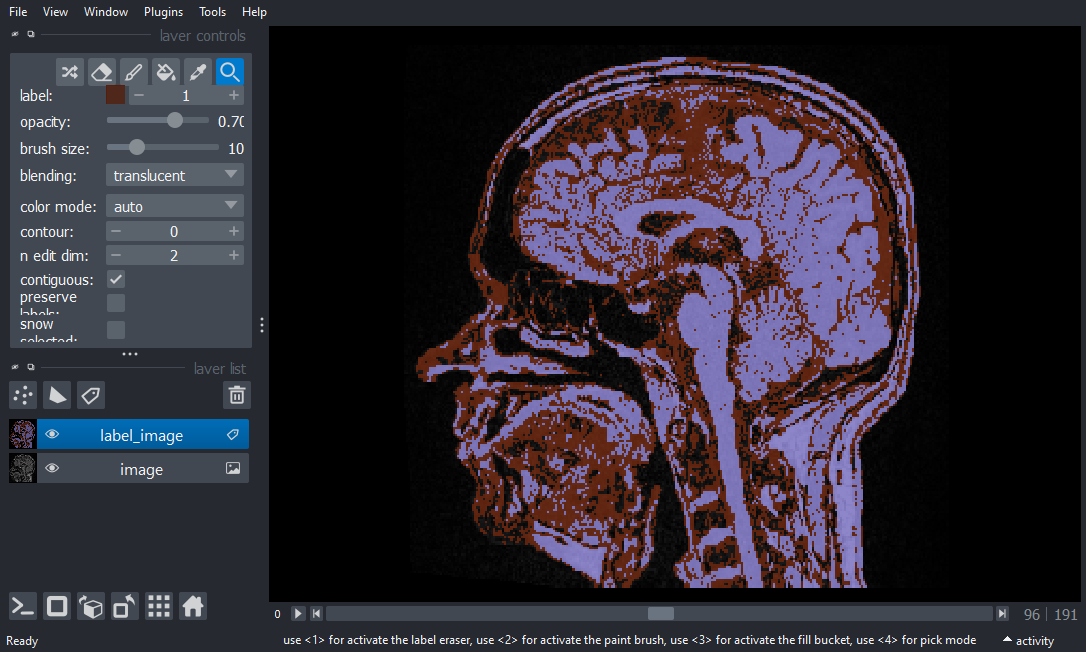

In [15]:
label_image = (image > 50) * 1 + (image > 110) * 2

labels_layer = viewer.add_labels(label_image)

napari.utils.nbscreenshot(viewer)

标签图层也可以相应地进行修改。

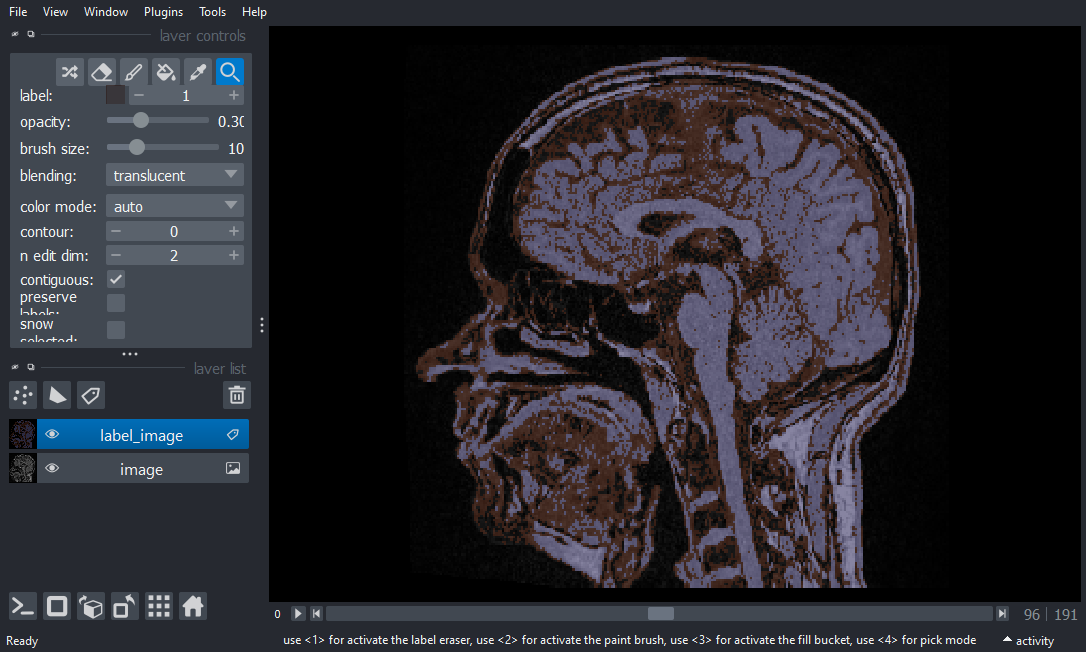

In [16]:
labels_layer.opacity = 0.3

napari.utils.nbscreenshot(viewer)

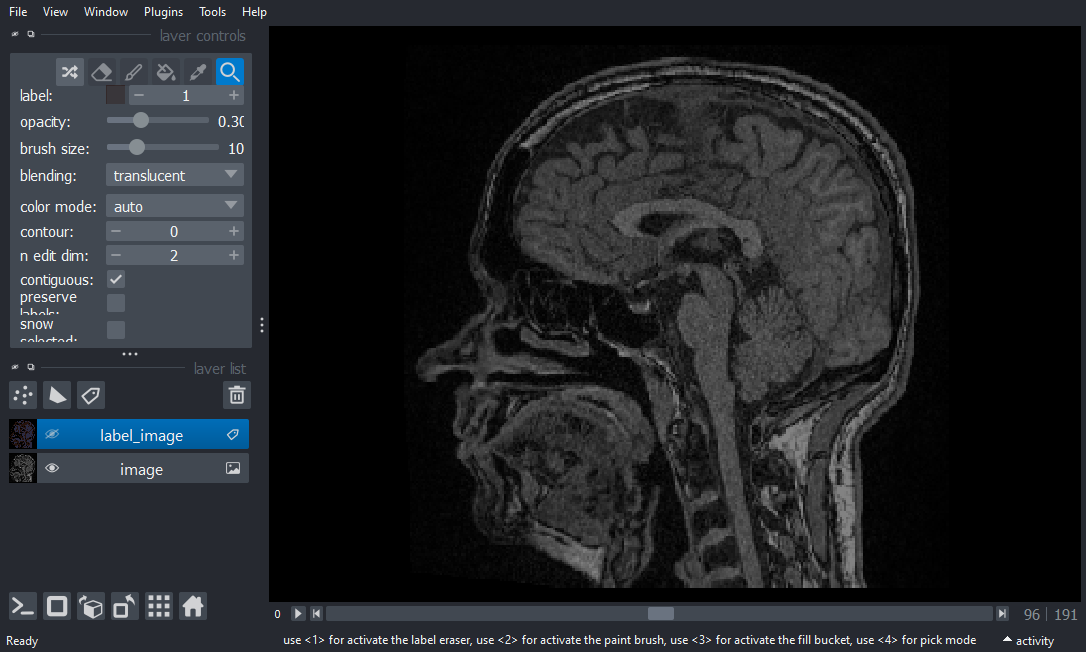

In [17]:
labels_layer.visible = False

napari.utils.nbscreenshot(viewer)

## 移除图层
最后但同样重要的是，我们还可以清理和移除图层。

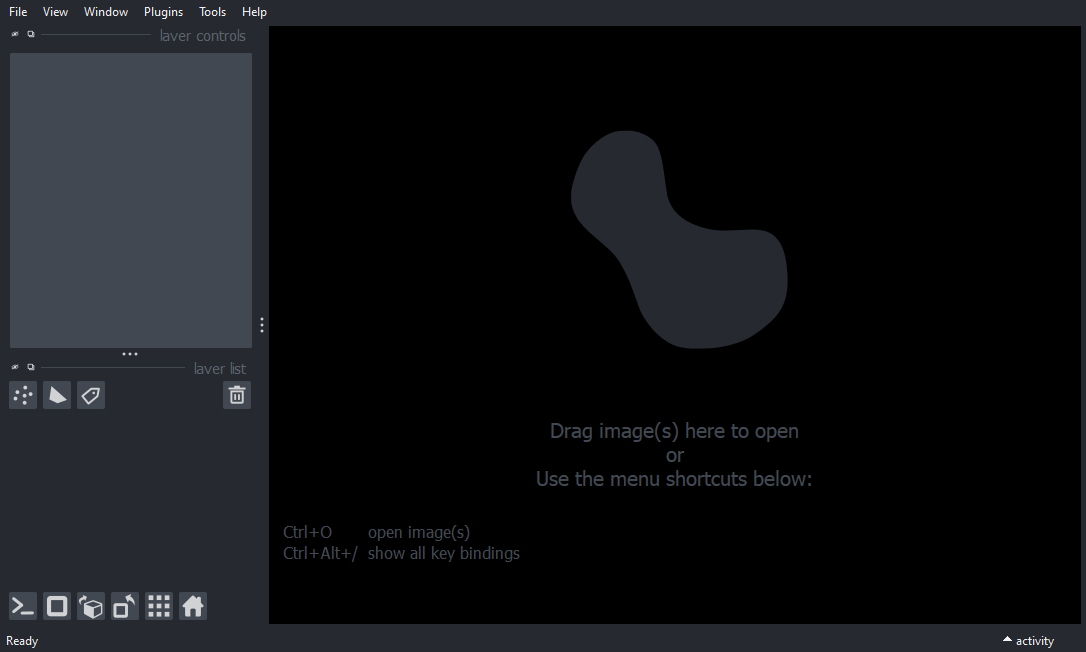

In [18]:
for l in list(viewer.layers):
    viewer.layers.remove(l)
    
napari.utils.nbscreenshot(viewer)

## 练习
创建一个新的笔记本，导入napari，加载图像`../data/hela-cells.tif`，并将其三个通道作为三个独立的图层添加到napari中。然后，在用户界面中尝试调整颜色映射和混合模式。你能让它看起来像ImageJ吗？同时查看napari的[图像图层教程](https://napari.org/tutorials/fundamentals/image.html)。你也能编程实现这样的可视化吗？